# Explore Healthcare vs Economy

This notebook investigates the relationship between **economic performance** and **health outcomes** across countries using World Bank data.

The analysis focuses on the following key indicators:
- GDP per capita  
- Health expenditure (% of GDP)  
- Life expectancy  
- Infant mortality  
- Population  

The workflow follows these main steps:
1. Load and inspect the dataset.
2. Handle missing values and extract relevant indicators.
3. Compute basic statistics, e.g., average GDP per capita.
4. Visualize GDP per capita distribution.
5. Explore relationships between GDP, Life Expectancy, and Health Expenditure.
6. Save cleaned datasets for further analysis.
7. Compute correlations between economic and health indicators.
8. Plot histograms and scatter plots to visualize trends.

## Load and Inspect Dataset

**Purpose:**  
This cell reads the CSV data file and checks its contents to ensure it is correctly loaded.  

**Step-by-step explanation:**  
1. **Import libraries:**  
   - `matplotlib.pyplot` for plotting graphs later.  
   - `os` for handling file paths (optional here).  
   - `csv` for writing CSV files later.  

2. **Set file path:**  
   - The variable `file_path` points to the CSV file relative to the notebook’s location.  

3. **Read the file:**  
   - The file is opened in read mode with UTF-8 encoding.  
   - `readlines()` loads all lines of the file into a list, where each element is a line.  

4. **Process the data:**  
   - The first line (header) is separated and split by commas to get column names.  
   - The remaining lines are split by commas into a list of lists called `data`, representing rows and columns.  

5. **Inspect the dataset:**  
   - Prints the header to verify column names.  
   - Prints the first 5 rows to quickly check the format and values.  

**Interpretation of the output:**  
- The header shows all column names, confirming they match expected indicators.  
- The first 5 rows allow you to spot potential issues, such as missing values or unexpected formatting, before proceeding with analysis.

In [95]:
# --- Import necessary libraries ---
import matplotlib.pyplot as plt
import os
import csv

# --- Set the path to the CSV file ---
# Note: This path is relative to the notebook's location.
file_path = '../data/worldbank_healthcare_data.csv'

# --- Read the CSV file line by line ---
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# --- Remove the header row and split the data into a list of lists ---
header = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

# --- Check the first 5 rows to ensure the file loaded correctly ---
print("Header:", header)
print("First 5 rows:")
for row in data[:5]:
    print(row)

Header: ['', '', 'gdp_per_capita', 'health_exp_gdp', 'life_expectancy', 'infant_mortality', 'population']
First 5 rows:
['AFE', '2015', '1479.61525980543', '5.9713905922151', '61.713030523495', '49.010304526817', '607123269.0']
['AFE', '2016', '1329.80728479234', '6.06778640864792', '62.1679813169199', '47.7739196418728', '623369401.0']
['AFE', '2017', '1520.21223076132', '5.929017140206', '62.5912750961501', '46.7832639603647', '640058741.0']
['AFE', '2018', '1538.90167917284', '5.789154817055', '63.3306913582336', '43.8518142030077', '657801085.0']
['AFE', '2019', '1493.81793829992', '5.81267571889709', '63.8572612837042', '42.1900739123661', '675950189.0']


## Inspect Data and Compute Average GDP per Capita

**Purpose:**  
This cell checks for missing values in the dataset and calculates the average GDP per capita, giving a first quantitative insight into the data.

**Step-by-step explanation:**

1. **Count rows with missing data:**  
   - Initializes `missing_rows` to 0.  
   - Loops through each row in the dataset.  
   - Checks if any cell in the row is empty (`''`).  
   - Increments `missing_rows` if a missing value is found.  
   - **Output:** Number of rows with missing data, helping identify data quality issues.

2. **Extract GDP per capita values:**  
   - Creates an empty list `gdp_values`.  
   - Loops through each row and attempts to convert the GDP value (column index 2) to a float.  
   - Skips rows where conversion fails (e.g., missing or invalid data).  
   - **Result:** A clean list of GDP per capita values, ready for analysis.

3. **Compute average GDP per capita:**  
   - Sums all valid GDP values and divides by the number of values.  
   - **Output:** Average GDP per capita across all countries, providing a baseline for further analysis.

**Interpretation of the output:**  
- `Rows with missing data:` helps understand how much of the dataset may need cleaning or special handling.  
- `Average GDP per capita:` gives a quick sense of the global economic level represented in the dataset.  

In [96]:
# --- Count rows with missing data ---
missing_rows = 0
for row in data:
    if '' in row:  # If any column is empty
        missing_rows += 1
print("Rows with missing data:", missing_rows)

# --- Extract GDP per capita values from column index 2 ---
gdp_values = []
for row in data:
    try:
        gdp = float(row[2])  # Convert string to float
        gdp_values.append(gdp)
    except:
        pass  # Skip rows where conversion fails

# --- Compute the average GDP per capita ---
average_gdp = sum(gdp_values) / len(gdp_values)
print("Average GDP per capita:", average_gdp)

Rows with missing data: 1016
Average GDP per capita: 17579.61431089643


## Visualize GDP per Capita for the First 50 Countries

**Purpose:**  
This cell creates a simple line plot to visually explore the variation of GDP per capita across the first 50 countries in the dataset.

**Step-by-step explanation:**

1. **Select data:**  
   - `gdp_values[:50]` selects the first 50 GDP per capita values from the cleaned list.  

2. **Create the line plot:**  
   - `plt.plot()` draws a line connecting the GDP values in sequence.  
   - `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` add descriptive labels for clarity.  

3. **Display the plot:**  
   - `plt.show()` renders the plot in the notebook.

**Interpretation of the output:**  
- The line plot shows how GDP per capita varies among the first 50 countries.  
- Peaks indicate countries with higher GDP, while valleys indicate lower GDP.  
- This visualization helps identify extreme values or trends before deeper analysis.

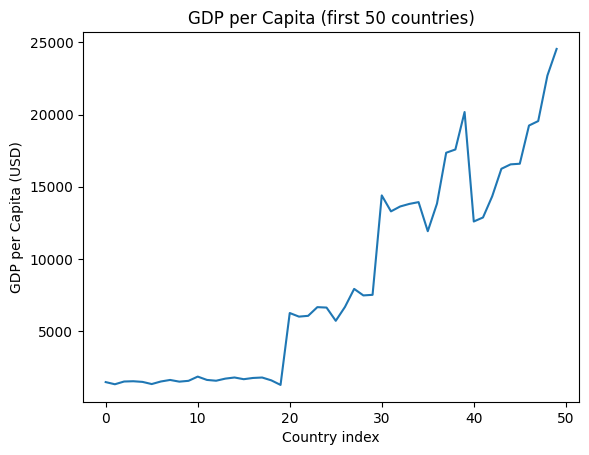

In [97]:
# --- Basic line plot of GDP per capita for the first 50 countries ---
plt.plot(gdp_values[:50])
plt.title("GDP per Capita (first 50 countries)")
plt.xlabel("Country index")
plt.ylabel("GDP per Capita (USD)")
plt.show()

## Scatter Plot: GDP per Capita vs Life Expectancy

**Purpose:**  
This cell examines the relationship between a country's wealth (GDP per capita) and its average life expectancy by creating a scatter plot.

**Step-by-step explanation:**

1. **Extract clean data:**  
   - Initialize two empty lists: `clean_gdp` for GDP and `life_expectancy` for life expectancy.  
   - Loop through each row in the dataset and attempt to convert GDP (`row[2]`) and Life Expectancy (`row[4]`) to floats.  
   - If successful, append the values to the corresponding list.  
   - Rows with missing or invalid data are skipped.

2. **Verify data alignment:**  
   - Print the lengths of both lists to ensure they match.  
   - This guarantees that each GDP value has a corresponding Life Expectancy value.

3. **Create scatter plot:**  
   - `plt.scatter(clean_gdp, life_expectancy, alpha=0.5)` plots GDP on the x-axis and Life Expectancy on the y-axis.  
   - `alpha=0.5` makes overlapping points semi-transparent for better visibility.  
   - Titles and axis labels provide context.

**Interpretation of the output:**  
- Each point represents a country.  
- The plot allows visual inspection of correlations: generally, countries with higher GDP tend to have higher life expectancy.  
- Outliers (points far from the main cluster) may indicate unusual cases or data errors.

Number of valid GDP values: 2309
Number of valid Life Expectancy values: 2309


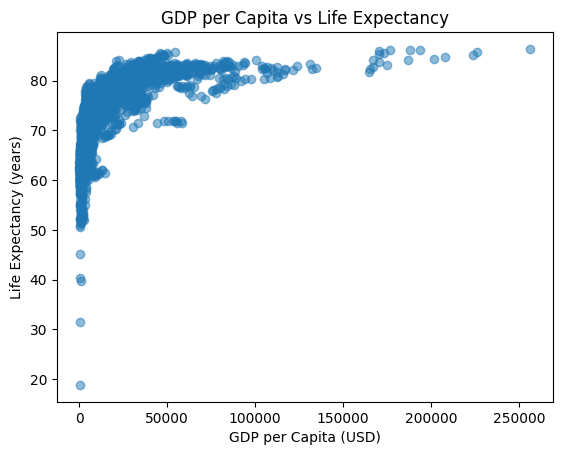

In [98]:
# --- Extract GDP and Life Expectancy values, skipping missing/invalid rows ---
life_expectancy = []
clean_gdp = []

for row in data:
    try:
        gdp = float(row[2])
        life = float(row[4])
        clean_gdp.append(gdp)
        life_expectancy.append(life)
    except:
        pass  # Skip rows with invalid data

# --- Ensure both lists have the same length ---
print("Number of valid GDP values:", len(clean_gdp))
print("Number of valid Life Expectancy values:", len(life_expectancy))

# --- Create a scatter plot ---
plt.scatter(clean_gdp, life_expectancy, alpha=0.5)
plt.title("GDP per Capita vs Life Expectancy")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy (years)")
plt.show()

## Export Simplified Dataset

**Purpose:**  
This cell saves a cleaned and simplified version of the dataset containing only GDP per capita and Life Expectancy. This file can be used for future analyses without reprocessing the full dataset.

**Step-by-step explanation:**

1. **Define export path:**  
   - `export_file_path` specifies where the new CSV file will be saved (`../data/gdp_life_expectancy.csv`).

2. **Write the CSV file:**  
   - Open the file in write mode with UTF-8 encoding.  
   - Write the header row: `'gdp_per_capita,life_expectancy'`.  
   - Loop through the `clean_gdp` and `life_expectancy` lists simultaneously using `zip()` and write each pair as a new row.

3. **Confirm export:**  
   - Print a message confirming the file location.

**Interpretation of the output:**  
- The resulting CSV contains only the aligned GDP and Life Expectancy values.  
- This simplifies further analysis, sharing, or visualization without having to deal with missing or irrelevant data.

In [99]:
# --- Save only GDP and Life Expectancy columns for further analysis ---
export_file_path = '../data/gdp_life_expectancy.csv'

with open(export_file_path, 'w', encoding='utf-8') as f:
    f.write('gdp_per_capita,life_expectancy\n')  # Write header
    for gdp, life in zip(clean_gdp, life_expectancy):
        f.write(f"{gdp},{life}\n")

print("Simplified dataset saved to:", export_file_path)

Simplified dataset saved to: ../data/gdp_life_expectancy.csv


## GDP Analysis: Extremes and Comparison with Average

**Purpose:**  
This cell analyzes GDP per capita across all countries to understand distribution patterns, identify extremes, and compare countries to the global average.

**Step-by-step explanation:**

1. **Initialize counters:**  
   - `above_average` and `below_average` track the number of countries with GDP above or below the global average.

2. **Count countries relative to average GDP:**  
   - Loop through all rows, convert GDP values to float.  
   - Increment `above_average` if GDP > `average_gdp`.  
   - Increment `below_average` otherwise.  
   - Skip rows with missing or invalid GDP.

3. **Print summary counts:**  
   - Outputs how many countries are above or below average GDP.

4. **Find extreme GDP values:**  
   - `max_gdp` and `min_gdp` store the highest and lowest GDP per capita from the dataset.  

5. **Identify corresponding countries:**  
   - Loop again through data to find the country codes (`row[0]`) for the highest and lowest GDP.  

6. **Print extremes:**  
   - Displays the countries with the highest and lowest GDP per capita and their values.

**Interpretation of results:**  
- Provides insight into GDP distribution among countries.  
- Identifies wealthiest and poorest nations in the dataset.  
- Helps contextualize GDP differences when analyzing economic and health indicators.

In [100]:
# --- Initialize counters ---
above_average = 0
below_average = 0

# --- Count countries above and below the average GDP ---
for row in data:
    try:
        gdp = float(row[2])
        if gdp > average_gdp:
            above_average += 1
        else:
            below_average += 1
    except:
        pass  # Skip rows with invalid GDP

print("Countries with GDP above average:", above_average)
print("Countries with GDP below average:", below_average)

# --- Find highest and lowest GDP values ---
max_gdp = max(gdp_values)
min_gdp = min(gdp_values)
print("Highest GDP per capita:", max_gdp)
print("Lowest GDP per capita:", min_gdp)

# --- Identify countries with these values ---
country_high = ""
country_low = ""
for row in data:
    try:
        gdp = float(row[2])
        if gdp == max_gdp:
            country_high = row[0]
        elif gdp == min_gdp:
            country_low = row[0]
    except:
        pass

print("Country with highest GDP per capita:", country_high)
print("Country with lowest GDP per capita:", country_low)

Countries with GDP above average: 744
Countries with GDP below average: 1796
Highest GDP per capita: 256580.515122745
Lowest GDP per capita: 153.930217854023
Country with highest GDP per capita: MCO
Country with lowest GDP per capita: BDI


## Distribution of GDP per Capita

**Purpose:**  
This cell creates a histogram to visualize how GDP per capita is distributed across countries and regions.

**Step-by-step explanation:**

1. **Histogram plot:**  
   - `plt.hist()` is used to create a histogram of GDP values.  
   - `bins=50` divides the GDP range into 50 intervals.  
   - `color='skyblue'` and `edgecolor='black'` make the bars visually clear.

2. **Labels and title:**  
   - `plt.title()` sets the chart title.  
   - `plt.xlabel()` and `plt.ylabel()` label the axes.

3. **Display plot:**  
   - `plt.show()` renders the histogram.

**Interpretation of results:**  
- Shows how GDP per capita varies among countries.  
- Helps identify clusters of countries with low, medium, or high GDP.  
- Highlights potential outliers with extremely high or low GDP values.

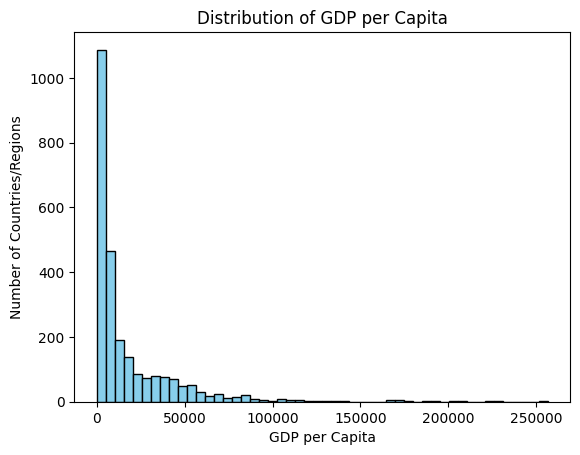

In [101]:
# --- Plot a histogram of GDP per capita ---
plt.hist(gdp_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries/Regions")
plt.show()

## Correlation Analysis Between GDP, Life Expectancy, and Health Expenditure

**Purpose:**  
This cell computes the relationships between key economic and health indicators to understand how they influence each other.

**Step-by-step explanation:**

1. **Extract relevant columns:**  
   - `life_expectancy` → Life Expectancy values (column 4).  
   - `health_exp` → Health Expenditure (% of GDP, column 3).  
   - Rows with missing or invalid values are skipped.

2. **Align arrays:**  
   - Ensure `gdp_values`, `life_expectancy`, and `health_exp` have the same length.  
   - Use `np.array()` to convert lists to NumPy arrays for computation.

3. **Compute Pearson correlations:**  
   - `np.corrcoef(x, y)[0,1]` calculates the correlation coefficient between two arrays.  
   - `corr_gdp_life` → GDP vs Life Expectancy  
   - `corr_gdp_health` → GDP vs Health Expenditure  
   - `corr_life_health` → Life Expectancy vs Health Expenditure

4. **Print results:**  
   - Shows the strength and direction of linear relationships between the variables.

**Interpretation:**  
- Values close to 1 → strong positive correlation.  
- Values close to -1 → strong negative correlation.  
- Values near 0 → weak or no linear correlation.  

This helps assess whether wealthier countries spend more on healthcare and if higher spending relates to better life expectancy.

In [102]:
# --- Extract Life Expectancy and Health Expenditure ---
life_expectancy = []
health_exp = []

for row in data:
    try:
        life_expectancy.append(float(row[4]))  # Column 4: Life Expectancy
        health_exp.append(float(row[3]))       # Column 3: Health Expenditure (% of GDP)
    except:
        pass  # Skip rows with missing or invalid values

# --- Compute simple correlations manually ---
import numpy as np

# Ensure lists are the same length
min_len = min(len(gdp_values), len(life_expectancy), len(health_exp))
gdp_arr = np.array(gdp_values[:min_len])
life_arr = np.array(life_expectancy[:min_len])
health_arr = np.array(health_exp[:min_len])

# Compute Pearson correlation
corr_gdp_life = np.corrcoef(gdp_arr, life_arr)[0, 1]
corr_gdp_health = np.corrcoef(gdp_arr, health_arr)[0, 1]
corr_life_health = np.corrcoef(life_arr, health_arr)[0, 1]

print(f"Correlation GDP vs Life Expectancy: {corr_gdp_life:.3f}")
print(f"Correlation GDP vs Health Expenditure: {corr_gdp_health:.3f}")
print(f"Correlation Life Expectancy vs Health Expenditure: {corr_life_health:.3f}")

Correlation GDP vs Life Expectancy: 0.009
Correlation GDP vs Health Expenditure: 0.025
Correlation Life Expectancy vs Health Expenditure: 0.006


## Preparing Healthcare Expenditure vs Life Expectancy Data

**Purpose:**  
This cell prepares the data needed to analyze the relationship between **healthcare spending** and **life expectancy**.

**Step-by-step explanation:**

1. **Create empty lists:**  
   - `health_exp` → to store healthcare expenditure (% of GDP).  
   - `life_expectancy_values` → to store life expectancy values (years).

2. **Loop through the dataset:**  
   - Convert column values to `float`.  
   - Skip rows with missing or invalid data using a `try-except` block.

3. **Check data consistency:**  
   - Print the number of valid entries in both lists to ensure they are aligned.  
   - Both lists must have the same length to create an accurate scatter plot in the next step.

**Interpretation:**  
- This step ensures we only include valid data points for plotting and analysis.  
- Clean, aligned lists prevent errors in visualization and correlation computations.

In [103]:
# --- Extract Healthcare Expenditure vs Life Expectancy ---

# Create empty lists for healthcare spending and life expectancy
health_exp = []
life_expectancy_values = []

# --- Loop through data, skip rows with missing or invalid values --- 
for row in data:
    try:
        exp = float(row[3])            # health_exp_gdp column
        life = float(row[4])           # life_expectancy column
        health_exp.append(exp)
        life_expectancy_values.append(life)
    except:
        pass

# --- Check that both lists have the same length --- 
print("Number of valid entries:", len(health_exp), len(life_expectancy_values))

Number of valid entries: 2173 2173


## Scatter Plot: Healthcare Expenditure vs Life Expectancy

**Purpose:**  
Visualize the relationship between a country's **healthcare spending** and **life expectancy**.

**Step-by-step explanation:**

1. **Scatter plot creation:**  
   - `plt.scatter()` plots each country as a point with:  
     - X-axis: Healthcare expenditure (% of GDP)  
     - Y-axis: Life expectancy (years)  
   - `alpha=0.5` makes points slightly transparent to see overlapping points.  
   - `color='green'` distinguishes this plot from others.

2. **Add titles and labels:**  
   - `plt.title()` → Overall plot title.  
   - `plt.xlabel()` and `plt.ylabel()` → Describes each axis.

3. **Display the plot:**  
   - `plt.show()` renders the scatter plot.

**Interpretation:**  
- Each point represents a country-year entry.  
- The plot helps identify trends or outliers. For example, higher healthcare spending may correlate with higher life expectancy, but there could be exceptions.

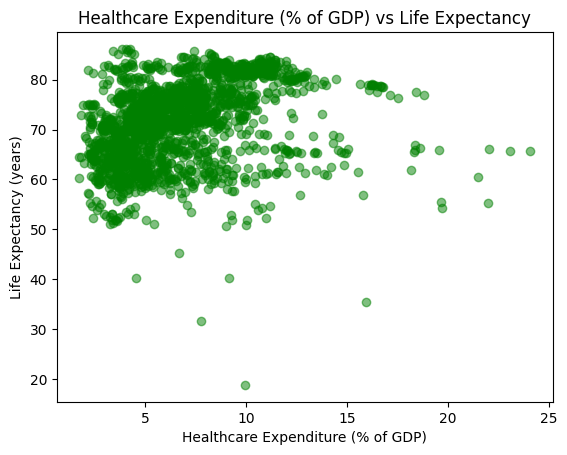

In [104]:
# --- Scatter plot of Healthcare Expenditure vs Life Expectancy --- 

plt.scatter(health_exp, life_expectancy_values, alpha=0.5, color='green')
plt.title("Healthcare Expenditure (% of GDP) vs Life Expectancy")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.show()

## Basic Statistics: Healthcare Expenditure

**Purpose:**  
Summarize the healthcare spending data to understand general trends and extremes.

**Step-by-step explanation:**

1. **Average healthcare expenditure:**  
   - `avg_health_exp = sum(health_exp) / len(health_exp)`  
   - Computes the mean percentage of GDP spent on healthcare across all valid entries.

2. **Maximum and minimum values:**  
   - `max_health_exp = max(health_exp)` → Highest healthcare spending in the dataset.  
   - `min_health_exp = min(health_exp)` → Lowest healthcare spending in the dataset.

3. **Print results:**  
   - Shows the average, highest, and lowest values to quickly assess global healthcare investment levels.

**Interpretation:**  
- Helps identify countries that spend unusually high or low percentages of GDP on healthcare.  
- Provides a numerical summary to complement visual analyses like scatter plots.

In [105]:
# --- Compute basic statistics for healthcare expenditure --- 

avg_health_exp = sum(health_exp) / len(health_exp)
max_health_exp = max(health_exp)
min_health_exp = min(health_exp)

print("Average healthcare expenditure (% GDP):", avg_health_exp)
print("Highest healthcare expenditure (% GDP):", max_health_exp)
print("Lowest healthcare expenditure (% GDP):", min_health_exp)

Average healthcare expenditure (% GDP): 6.624061582589511
Highest healthcare expenditure (% GDP): 24.07940674
Lowest healthcare expenditure (% GDP): 1.7540164


## Data Cleaning: Align GDP and Life Expectancy

**Purpose:**  
Ensure that the GDP per capita and Life Expectancy lists contain only valid, numeric entries and are properly aligned for analysis.

**Step-by-step explanation:**

1. **Initialize empty lists:**  
   - `gdp_values` → will store valid GDP per capita values.  
   - `life_expectancy` → will store corresponding life expectancy values.

2. **Loop through dataset:**  
   - Convert the GDP and Life Expectancy columns to floats.  
   - Append only valid numbers to the respective lists.  
   - Skip any row with missing or invalid values (`try/except` block).

3. **Check dataset length:**  
   - Prints the number of valid entries in each list.  
   - Ensures both lists are the same length, which is necessary for correlation calculations and plotting.

**Interpretation:**  
- Guarantees clean, aligned data for subsequent analysis, avoiding errors from missing or malformed entries.  
- The length of the cleaned lists shows how many country-year entries are valid for analysis.

In [106]:
# --- Clean and align GDP and Life Expectancy data --- 

gdp_values = []
life_expectancy = []

for row in data:
    try:
        gdp = float(row[2])
        life = float(row[4])
        gdp_values.append(gdp)
        life_expectancy.append(life)
    except:
        # Skip rows with missing or invalid numbers
        pass

print(f"Cleaned dataset length: {len(gdp_values)} (GDP) and {len(life_expectancy)} (Life Expectancy)")

Cleaned dataset length: 2309 (GDP) and 2309 (Life Expectancy)


## Correlation Analysis: GDP per Capita vs Life Expectancy

**Purpose:**  
Quantify the relationship between GDP per capita and life expectancy using a statistical measure.

**Step-by-step explanation:**

1. **Convert lists to NumPy arrays:**  
   - `gdp_array` and `life_array` are created from the cleaned lists.  
   - NumPy arrays enable efficient numerical operations and correlation calculations.

2. **Compute Pearson correlation coefficient:**  
   - `np.corrcoef(gdp_array, life_array)[0, 1]` calculates the correlation between GDP and Life Expectancy.  
   - The result ranges from `-1` (perfect negative correlation) to `1` (perfect positive correlation), with `0` meaning no correlation.

3. **Print the result:**  
   - Shows how strongly GDP per capita and life expectancy are related.

**Interpretation:**  
- A positive value indicates that countries with higher GDP generally have higher life expectancy.  
- The closer the correlation is to 1, the stronger the relationship.

In [107]:
# --- Compute the correlation between GDP per capita and Life Expectancy --- 

import numpy as np

gdp_array = np.array(gdp_values)
life_array = np.array(life_expectancy)

correlation = np.corrcoef(gdp_array, life_array)[0, 1]
print(f"Correlation between GDP per capita and Life Expectancy: {correlation:.4f}")

Correlation between GDP per capita and Life Expectancy: 0.6147


## Scatter Plot: GDP per Capita vs Life Expectancy

**Purpose:**  
Visualize the relationship between GDP per capita and life expectancy across countries.

**Step-by-step explanation:**

1. **Create a figure:**  
   - `plt.figure(figsize=(8, 5))` sets the size of the plot.

2. **Plot data points:**  
   - `plt.scatter(gdp_values, life_expectancy, alpha=0.5, color='teal')` creates a scatter plot.  
   - Each point represents a country, with GDP on the x-axis and life expectancy on the y-axis.  
   - `alpha=0.5` makes points semi-transparent to reduce overlap visibility issues.

3. **Add labels and title:**  
   - `plt.title`, `plt.xlabel`, and `plt.ylabel` provide context for the plot.

4. **Add grid lines:**  
   - `plt.grid(True, linestyle='--', alpha=0.7)` adds a light dashed grid for better readability.

5. **Display the plot:**  
   - `plt.show()` renders the scatter plot.

**Interpretation:**  
- Visual inspection confirms whether wealthier countries tend to have higher life expectancy.  
- Outliers or unusual patterns can be easily identified.

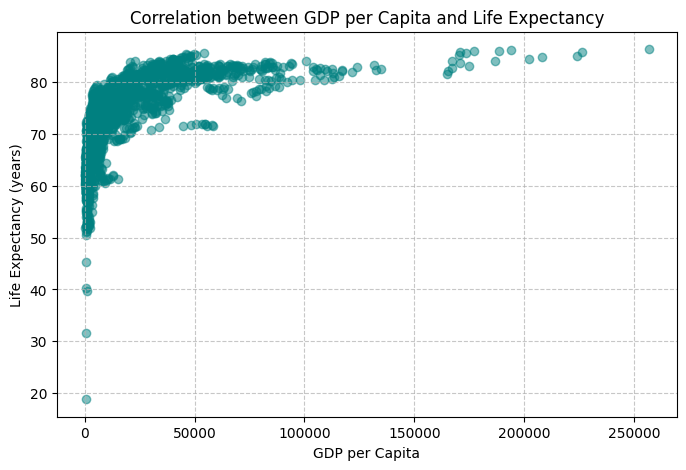

In [108]:
# --- Visualize the correlation between GDP and Life Expectancy --- 

plt.figure(figsize=(8, 5))
plt.scatter(gdp_values, life_expectancy, alpha=0.5, color='teal')
plt.title("Correlation between GDP per Capita and Life Expectancy")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy (years)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Enhanced Scatter Plot: GDP per Capita vs Life Expectancy

**Purpose:**  
Visualize the relationship between GDP per capita and life expectancy with an explicit correlation annotation.

**Step-by-step explanation:**

1. **Create a figure:**  
   - `plt.figure(figsize=(10,6))` sets a larger plot size for clarity.

2. **Plot data points:**  
   - `plt.scatter(gdp_values, life_expectancy, alpha=0.5, color='teal')` creates the scatter plot.  
   - Each point represents a country.  
   - `alpha=0.5` makes points semi-transparent.

3. **Add title and axis labels:**  
   - `plt.title`, `plt.xlabel`, and `plt.ylabel` provide context for the plot.

4. **Annotate correlation:**  
   - `plt.text(...)` places the correlation coefficient directly on the plot.  
   - `transform=plt.gca().transAxes` uses relative coordinates (0–1) for placement.  
   - `bbox=dict(...)` adds a semi-transparent box around the text for better visibility.

5. **Display the plot:**  
   - `plt.show()` renders the figure.

**Interpretation:**  
- The correlation value displayed on the plot quantifies the strength of the relationship.  
- A higher correlation confirms that higher GDP per capita is generally associated with longer life expectancy.  
- Visual inspection helps spot outliers or patterns that may not appear from the correlation alone.

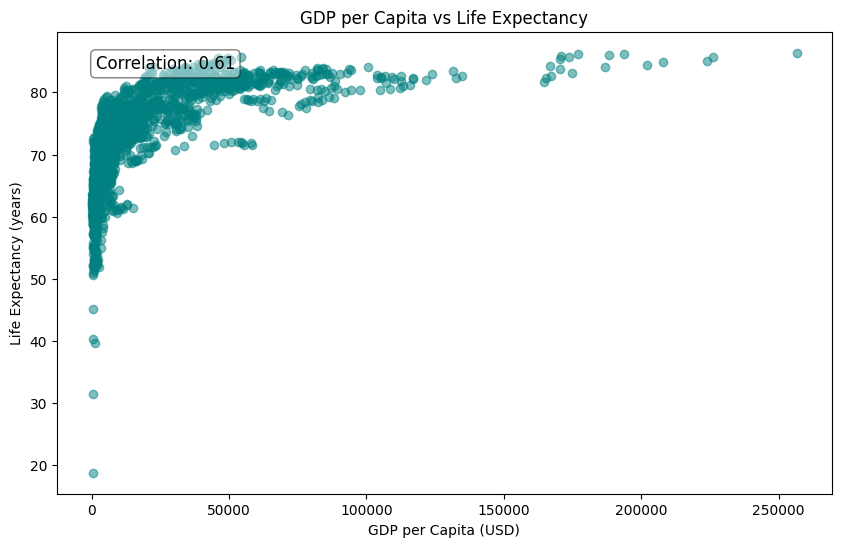

In [109]:
# --- Scatter plot of GDP per Capita vs Life Expectancy with correlation annotation --- 

plt.figure(figsize=(10,6))
plt.scatter(gdp_values, life_expectancy, alpha=0.5, color='teal')
plt.title("GDP per Capita vs Life Expectancy")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy (years)")

# --- Annotate correlation on the plot --- 
plt.text(
    0.05, 0.95, f"Correlation: {correlation:.2f}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

plt.show()


## Export Cleaned Dataset

- Saves aligned GDP and Life Expectancy pairs to `gdp_life_expectancy_cleaned.csv`.  

**Purpose:**  
- Provides a reliable, ready-to-use dataset for further analysis or sharing.  
- Ensures exported data contains only valid, aligned entries.

## Save Cleaned GDP and Life Expectancy Data

**Purpose:**  
Export the cleaned dataset containing only valid GDP per capita and Life Expectancy values to a new CSV file. This allows for further analysis or sharing without including incomplete or invalid rows.

**Step-by-step explanation:**

1. **Import CSV module:**  
   - `import csv` is used to handle CSV file writing in Python.

2. **Define output path:**  
   - `output_file = '../data/gdp_life_expectancy_cleaned.csv'` specifies where the cleaned CSV will be saved.

3. **Open file for writing:**  
   - `with open(output_file, 'w', newline='', encoding='utf-8') as f:` opens the file in write mode.  
   - `newline=''` ensures correct line breaks across platforms.  
   - `encoding='utf-8'` preserves special characters if present.

4. **Write header row:**  
   - `writer.writerow(['GDP_per_Capita', 'Life_Expectancy'])` adds column names to the CSV.

5. **Write data rows:**  
   - `for gdp, life in zip(gdp_values, life_expectancy):` loops over cleaned GDP and life expectancy lists.  
   - Each pair is written as a row in the CSV.

6. **Confirmation message:**  
   - `print(f"Cleaned dataset saved to: {output_file}")` notifies the user that the file has been saved successfully.

**Result:**  
- A new CSV file containing only aligned and valid GDP and Life Expectancy data.  
- Ready for plotting, correlation analysis, or sharing.

In [110]:
# --- Save the cleaned GDP and Life Expectancy data to a new CSV --- 

import csv

# Define the output file path
output_file = '../data/gdp_life_expectancy_cleaned.csv'

# Write the cleaned data
with open(output_file, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # Write header
    writer.writerow(['GDP_per_Capita', 'Life_Expectancy'])
    # Write rows
    for gdp, life in zip(gdp_values, life_expectancy):
        writer.writerow([gdp, life])

print(f"Cleaned dataset saved to: {output_file}")


Cleaned dataset saved to: ../data/gdp_life_expectancy_cleaned.csv
